<a href="https://colab.research.google.com/github/phanikiran99/kaggle/blob/master/EDA_Covid19India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import requests

#plotly
import plotly.graph_objects as go
import plotly.express as px
import plotly.graph_objects as go

import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
api = 'https://api.covid19india.org/data.json'
resp = requests.get(api)

In [0]:
caseTimeSeries = pd.DataFrame(resp.json()['cases_time_series'])
stateWise = pd.DataFrame(resp.json()['statewise'])
tested = pd.DataFrame(resp.json()['tested'])

In [0]:
testPlots = tested[['totalindividualstested','totalpositivecases','totalsamplestested','updatetimestamp']]
testPlots = testPlots.apply(lambda x: x.str.strip()).replace('', np.nan)
testPlots = testPlots.fillna(method='ffill')

In [234]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=testPlots['updatetimestamp'], y=testPlots['totalindividualstested'],name='Total Tested'))
fig.add_trace(go.Scatter(x=testPlots['updatetimestamp'],y=testPlots['totalpositivecases'],name='Total Positve cases'))
fig.update_layout(title_text="India Tested vs Positive Cases")
fig.show()

In [0]:
#caseTimeSeries

In [236]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=caseTimeSeries['date'], y=caseTimeSeries['totalconfirmed'], name='Total Confirmed'))
fig.add_trace(go.Scatter(x=caseTimeSeries['date'], y=caseTimeSeries['totalrecovered'], name='Total Recovered'))
fig.add_trace(go.Scatter(x=caseTimeSeries['date'], y=caseTimeSeries['totaldeceased'], name='Total Deceased'))
fig.add_trace(go.Bar(x=caseTimeSeries['date'], y=caseTimeSeries['dailyconfirmed'], name='Daily Confirmed'))
fig.add_trace(go.Bar(x=caseTimeSeries['date'], y=caseTimeSeries['dailydeceased'], name='Daily Deceased'))
fig.add_trace(go.Bar(x=caseTimeSeries['date'], y=caseTimeSeries['dailyrecovered'], name='Daily Recovered'))

fig.update_layout(barmode='stack')
fig.show()

In [237]:
fig=go.Figure(data=[go.Bar(x=caseTimeSeries['date'], y=caseTimeSeries['dailyconfirmed'], name='Daily Confirmed'),
              go.Bar(x=caseTimeSeries['date'], y=caseTimeSeries['dailydeceased'], name='Daily Deceased'),
                   go.Bar(x=caseTimeSeries['date'], y=caseTimeSeries['dailyrecovered'], name='daily Receovered')]
              )

fig.update_layout(barmode='stack')
fig.show()


In [0]:
caseTimeSeries = caseTimeSeries.astype(int, errors='ignore')

In [0]:
caseTimeSeries['dailyconfirmed'] = caseTimeSeries.dailyconfirmed.apply(lambda x:int(x))

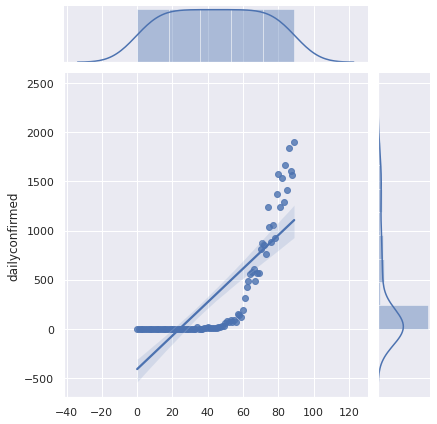

In [240]:
sns.jointplot(x=caseTimeSeries.index,y='dailyconfirmed',data=caseTimeSeries,kind='reg')

In [0]:
stateapi = 'https://api.covid19india.org/states_daily.json'
stateData = requests.get(stateapi).json()
stateTested = '	https://api.covid19india.org/state_test_data.json'
stateTestData = requests.get(stateTested).json()

In [242]:
stateTestData.keys()

dict_keys(['states_tested_data'])

In [0]:
stateDf = pd.DataFrame(stateData['states_daily'])
stateTestData = pd.DataFrame(stateTestData['states_tested_data'])

In [0]:
#stateTestData.head()

In [245]:
!pip install pandasql

In [0]:
# stateTestData.loc[stateTestData.groupby(by='updatedon')['state','testpositivityrate','testspermillion','totaltested'].idxmax()]

In [0]:
import pandasql as ps

In [0]:
query = """select * from stateTestData a where updatedon = (select max(updatedon) from stateTestData b where a.state = b.state)"""

In [0]:
stateTestLatest = ps.sqldf(query, locals())

In [250]:
stateDf.head()

,an,ap,ar,as,br,ch,ct,date,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,status,tg,tn,tr,tt,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,Confirmed,1,1,0,81,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,Recovered,0,0,0,9,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Deceased,0,0,0,2,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,Confirmed,2,0,0,27,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,Recovered,1,0,0,4,0,0,0


In [0]:
# stateDfConfirmed = stateDf[['ap','date','status']]
stateDfConfirmed = stateDf[stateDf['status'] == 'Confirmed'].fillna(0).replace('',0)
stateDfRecovered = stateDf[stateDf['status'] == 'Recovered'].fillna(0).replace('',0)
stateDfDeceased = stateDf[stateDf['status'] =='Deceased'].fillna(0).replace('',0)

In [252]:
stateDf.columns

Index(['an', 'ap', 'ar', 'as', 'br', 'ch', 'ct', 'date', 'dd', 'dl', 'dn',
       'ga', 'gj', 'hp', 'hr', 'jh', 'jk', 'ka', 'kl', 'la', 'ld', 'mh', 'ml',
       'mn', 'mp', 'mz', 'nl', 'or', 'pb', 'py', 'rj', 'sk', 'status', 'tg',
       'tn', 'tr', 'tt', 'up', 'ut', 'wb'],
      dtype='object')

In [0]:
stateTotalConfirmed =[] 
stateTotalDeceased =[]
stateTotalRecovered =[]
listStates = []
for col in stateDf:
    if col not in ['date','status']:
        listStates.append(col)
#         print (col)
        stateTotalConfirmed.append(np.sum(stateDfConfirmed[col].apply(lambda x: int(x))))
        stateTotalDeceased.append(np.sum(stateDfDeceased[col].apply(lambda x: int(x))))
        stateTotalRecovered.append(np.sum(stateDfRecovered[col].apply(lambda x:int(x))))

In [0]:
data = {'State':listStates, 'Confirmed':stateTotalConfirmed, 'Deceased':stateTotalDeceased, 'Recovered':stateTotalRecovered}

In [0]:
fullData  = pd.DataFrame(data=data)

In [0]:
fullData['Decease%'] = round((fullData['Deceased']/fullData['Confirmed'])*100,2)
fullData['Recover%'] = round((fullData['Recovered']/fullData['Confirmed'])*100,2)
fullData['Active%'] = round(((fullData['Confirmed'] -(fullData['Recovered']+fullData['Deceased']))/fullData['Confirmed'])*100,2)

In [0]:
#fullData[fullData['Confirmed'] > 100].sort_values(by='Active%', ascending=False).head(10)

In [0]:
#fullData[fullData['Confirmed'] > 100].sort_values(by='Decease%', ascending=False).head(20).reset_index()

In [0]:
#fullData[fullData['Confirmed'] > 100].sort_values(by='Recover%', ascending=False).head(20).reset_index()

In [0]:
#fullData.sort_values(by='Active%', ascending=False)

In [261]:
fig = go.Figure()
fig.add_trace(go.Bar(x=fullData['State'], y=fullData['Decease%'],marker_color='orange', name='Deceased %'))
fig.add_trace(go.Bar(x=fullData['State'], y=fullData['Recover%'],marker_color='green', name='Recovery %'))
fig.update_layout(barmode='stack', title='Deceased & Recovery %')
fig.show()

In [262]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=stateDfConfirmed['date'], y=stateDfConfirmed['ap'], name='AP Confirmed Cases'))
fig.add_trace(go.Scatter(x=stateDfConfirmed['date'], y=stateDfConfirmed['kl'], name='Kerala Confirmed Cases'))
fig.add_trace(go.Scatter(x=stateDfRecovered['date'], y=stateDfRecovered['ap'], name='AP Recovered Cases'))
fig.add_trace(go.Scatter(x=stateDfConfirmed['date'], y=stateDfConfirmed['tg'], name='TG Confirmed Cases'))
# fig.add_trace(go.Bar(x=stateDfConfirmed['date'], y=stateDfConfirmed['ap'], name='Confirmed Cases AP'))
fig.show()

In [263]:
!pip install geopandas

In [0]:
from geopandas import GeoSeries, GeoDataFrame, read_file
from shapely.geometry import Point
from pandas import Series

In [0]:
#geoData = read_file(r'C:\Users\phani\Documents\Learn\learn\geoplots\maps-master\States\Admin2.shp')

In [266]:
from google.colab import files
uploaded = files.upload()

Saving Admin2.cpg to Admin2 (2).cpg
Saving Admin2.dbf to Admin2 (2).dbf
Saving Admin2.prj to Admin2 (2).prj
Saving Admin2.shp to Admin2 (2).shp
Saving Admin2.shp.xml to Admin2.shp (2).xml
Saving Admin2.shx to Admin2 (2).shx


In [0]:
geoData = read_file('Admin2.shp')
geoList = geoData.sort_values(by='ST_NM').ST_NM.unique()

In [268]:
!ls

'Admin2 (1).cpg'  'Admin2 (2).cpg'   Admin2.cpg		  'Admin2.shp (2).xml'
'Admin2 (1).dbf'  'Admin2 (2).dbf'   Admin2.dbf		   Admin2.shp.xml
'Admin2 (1).prj'  'Admin2 (2).prj'   Admin2.prj		   Admin2.shx
'Admin2 (1).shp'  'Admin2 (2).shp'   Admin2.shp		   sample_data
'Admin2 (1).shx'  'Admin2 (2).shx'  'Admin2.shp (1).xml'


In [269]:
len(listStates)

38

In [0]:
dict ={}
for i,_ in enumerate(listStates):
    try:
        dict[_] = geoList[i]
    except IndexError:
        dict[_] = ""

In [0]:
dict = {'an': 'Andaman & Nicobar Island',
 'ap': 'Andhra Pradesh',
 'ar': 'Arunanchal Pradesh',
 'as': 'Assam',
 'br': 'Bihar',
 'ch': 'Chandigarh',
 'ct': 'Chhattisgarh',
 'dd': 'Dadara & Nagar Havelli',
 'dl': 'NCT of Delhi',
 'dn': 'Daman & Diu',
 'ga': 'Goa',
 'gj': 'Gujarat',
 'hp': 'Himachal Pradesh',
 'hr': 'Haryana',
 'jh': 'Jharkhand',
 'jk': 'Jammu & Kashmir',
 'ka': 'Karnataka',
 'kl': 'Kerala',
 'la': '',
 'ld': 'Lakshadweep',
 'mh': 'Maharashtra',
 'ml': 'Meghalaya',
 'mn': 'Manipur',
 'mp': 'Madhya Pradesh',
 'mz': 'Mizoram',
 'nl': 'Nagaland',
 'or': 'Odisha',
 'pb': 'Puducherry',
 'py': 'Punjab',
 'rj': 'Rajasthan',
 'sk': 'Sikkim',
 'tg': 'Telangana',
 'tn': 'Tamil Nadu',
 'tr': 'Tripura',
 'tt': '',
 'up': 'Uttar Pradesh',
 'ut': 'Uttarakhand',
 'wb': 'West Bengal'}

In [0]:
fullData['ST_NM'] = fullData['State'].map(dict)

In [0]:
geoFullData  = geoData.merge(fullData[['Decease%','ST_NM','Recover%','Active%']], on='ST_NM', how='outer')

In [0]:
geoFullData = geoFullData.dropna(subset=['geometry'])

In [0]:
geoFullData['coords'] = geoFullData['geometry'].apply(lambda x: x.representative_point().coords[:])
geoFullData['coords'] = [coords[0] for coords in geoFullData['coords']]

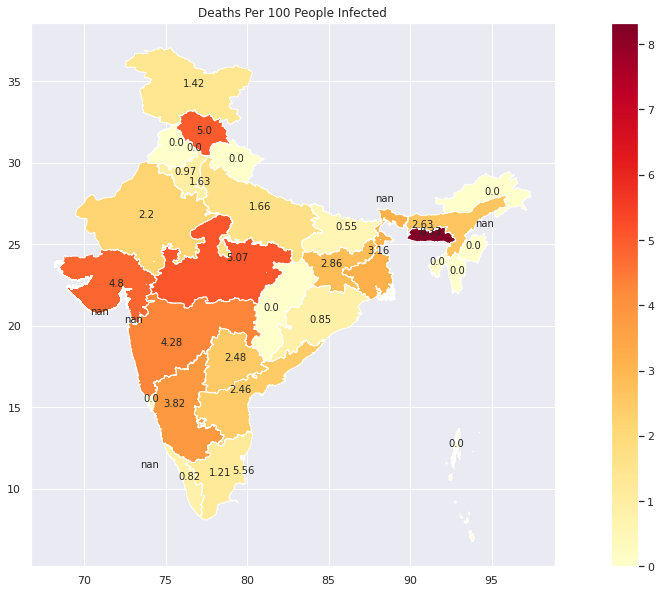

In [276]:
geoFullData.plot(figsize=(20,10), column='Decease%', legend=True,cmap='YlOrRd');

for idx, row in geoFullData.iterrows():
    plt.annotate(s=row['Decease%'],xy=row['coords'], horizontalalignment='center')
    
plt.title('Deaths Per 100 People Infected');

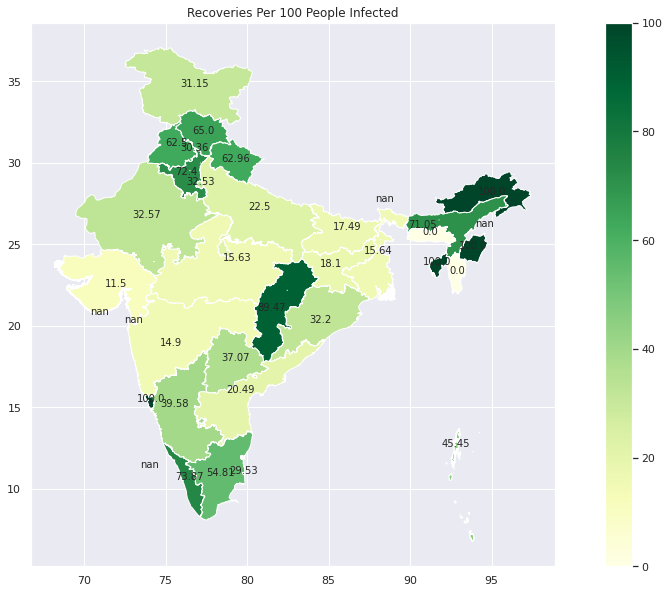

In [277]:
geoFullData.plot(figsize=(18,10), column='Recover%', legend=True,cmap='YlGn');
for idx, row in geoFullData.iterrows():
    plt.annotate(s=row['Recover%'],xy=row['coords'], horizontalalignment='center')
 
plt.title('Recoveries Per 100 People Infected');

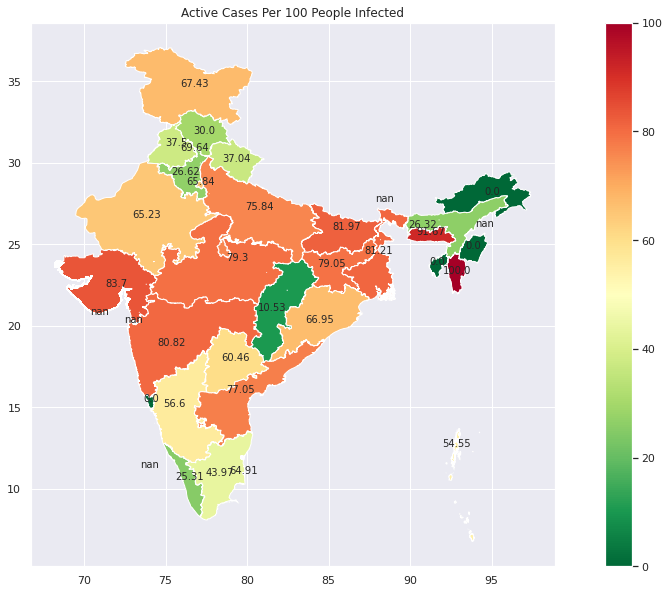

In [278]:
geoFullData.plot(figsize=(18,10), column='Active%', legend=True,cmap='RdYlGn_r');
for idx, row in geoFullData.iterrows():
    plt.annotate(s=row['Active%'],xy=row['coords'], horizontalalignment='center')
 
plt.title('Active Cases Per 100 People Infected');

In [0]:
stateTestLatest = ps.sqldf(query, locals())
stateTestLatest = stateTestLatest[['positive','state','testpositivityrate','testspermillion','totaltested','updatedon']]

In [0]:
stateTestLatest.columns=['positive','ST_NM','testpositivityrate','testspermillion','totaltested','updatedon']

In [281]:
set(stateTestLatest['ST_NM']) - set(geoData['ST_NM'])

{'Andaman and Nicobar Islands',
 'Arunachal Pradesh',
 'Delhi',
 'Jammu and Kashmir',
 'Ladakh'}

In [282]:
set(geoData['ST_NM'])- set(stateTestLatest['ST_NM'])

{'Andaman & Nicobar Island',
 'Arunanchal Pradesh',
 'Dadara & Nagar Havelli',
 'Daman & Diu',
 'Jammu & Kashmir',
 'Lakshadweep',
 'Manipur',
 'NCT of Delhi',
 'Sikkim',
 'West Bengal'}

In [0]:
state_dict_full ={'Andaman and Nicobar Islands':'Andaman & Nicobar Island',
 'Arunachal Pradesh':'Arunanchal Pradesh',
 'Delhi':'NCT of Delhi',
 'Jammu and Kashmir':'Jammu & Kashmir',
 'Ladakh':'Ladakh'}

In [0]:
# stateTestData

In [0]:
stateTestLatest['ST_NM'] = stateTestLatest['ST_NM'].replace(state_dict_full).fillna(0)

In [0]:
stateTestLatest = stateTestLatest.replace('',np.nan).fillna(0)

In [0]:
testGeo = geoData.merge(stateTestLatest, how='outer', on='ST_NM')

In [290]:
fig = go.Figure()
fig.add_trace(go.Bar(x=testGeo['ST_NM'],y=testGeo['totaltested']))

In [0]:
for col in testGeo:
  try:
    testGeo[col] = testGeo.apply(lambda x:  int(x))
  except:
    pass

In [0]:
cols = ['positive', 'ST_NM', 'testpositivityrate', 'testspermillion',
       'totaltested', 'updatedon']
testGeo[cols] = testGeo[cols].fillna(0)

In [0]:
testGeo['totaltested'] =testGeo['totaltested'].apply(lambda x:int(x))

In [0]:
testGeo = testGeo.drop(36)

In [0]:
testGeo['coords'] = testGeo['geometry'].apply(lambda x: x.representative_point().coords[:])
testGeo['coords'] = [coords[0] for coords in testGeo['coords']]

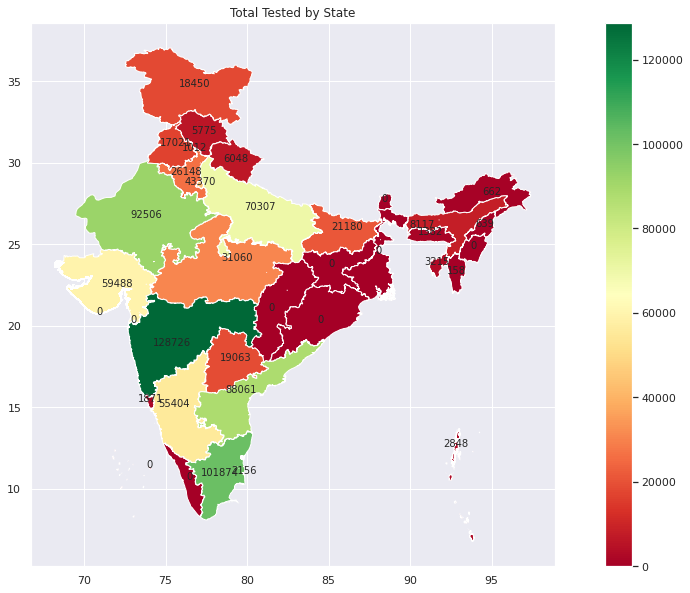

In [304]:
testGeo.plot(figsize=(18,10), column='totaltested', legend=True,cmap='RdYlGn');
for idx, row in testGeo.iterrows():
    plt.annotate(s=row['totaltested'],xy=row['coords'], horizontalalignment='center')
 
plt.title('Total Tested by State');

In [92]:
geoFullData[['ST_NM', 'Decease%', 'Recover%', 'Active%']].sort_values(by='Active%', ascending=False)

,ST_NM,Decease%,Recover%,Active%
21,Mizoram,0.00,0.00,100.00
20,Meghalaya,8.33,0.00,91.67
9,Gujarat,4.80,11.50,83.70
3,Bihar,0.55,17.49,81.97
33,West Bengal,3.16,15.64,81.21
18,Maharashtra,4.28,14.90,80.82
17,Madhya Pradesh,5.07,15.63,79.30
13,Jharkhand,2.86,18.10,79.05
35,Andhra Pradesh,2.46,20.49,77.05
31,Uttar Pradesh,1.66,22.50,75.84


# Basic Time Series

In [0]:
from pylab import rcParams
rcParams['figure.figsize'] = 18,8
import statsmodels.api as sm
import matplotlib
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [0]:
y = stateDfRecovered['ap'].apply(lambda x: int(x))
y.index = pd.to_datetime(stateDfRecovered['date'])

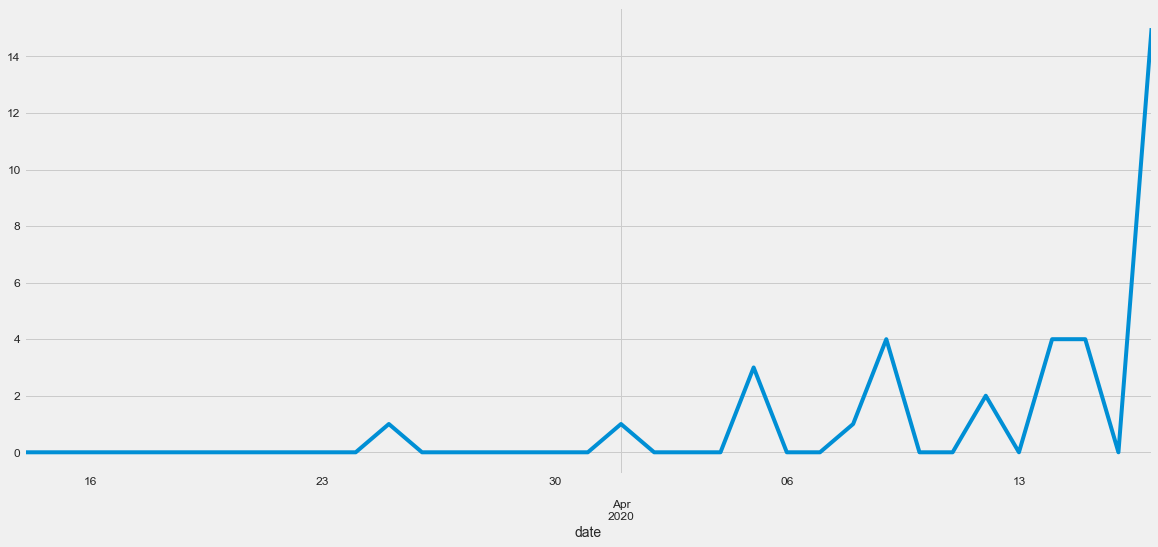

In [0]:
y.plot()

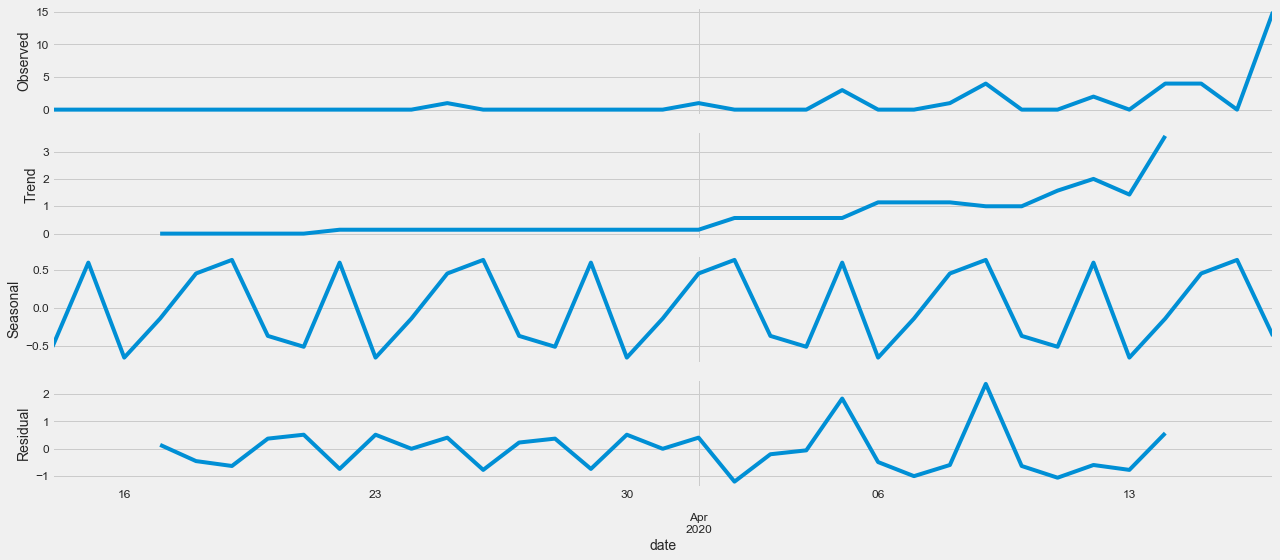

In [0]:

#ARIMA
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [0]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3196      0.396     -0.807      0.420      -1.096       0.457
ma.L1         -1.0000   6680.302     -0.000      1.000   -1.31e+04    1.31e+04
ar.S.L12       2.9177      1.298      2.247      0.025       0.373       5.463
sigma2         5.8800   3.93e+04      0.000      1.000    -7.7e+04     7.7e+04


C:\Users\phani\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



ValueError: operands could not be broadcast together with shapes (9,) (7,) (9,) 

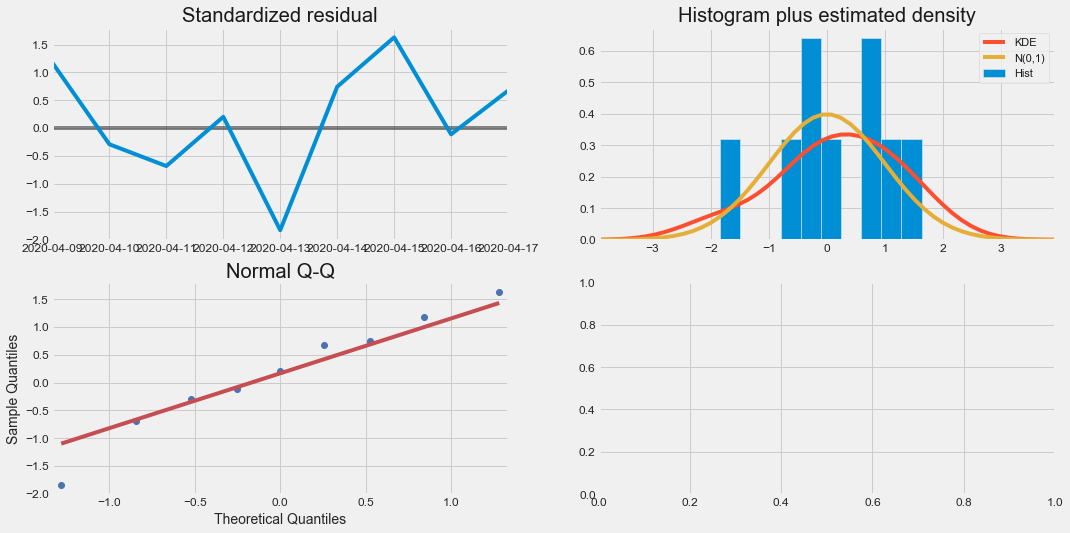

In [0]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [0]:
y_log = np.log(y)

C:\Users\phani\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning:

divide by zero encountered in log



In [0]:
y_roll = y.rolling(4).mean()

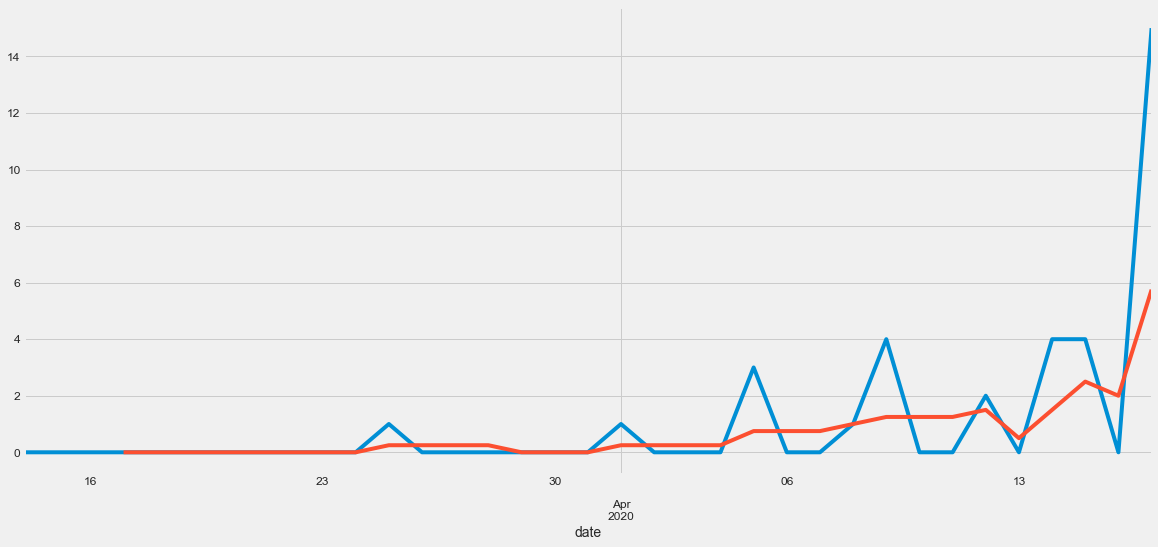

In [0]:
y.plot()
y_roll.plot()